<html class="tds-theme--normal" dir="ltr" lang="es-ES"><head>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="/ar_ae/inventory/used/my" hreflang="ar-ae" rel="alternate"/>
<link href="/ar_qa/inventory/used/my" hreflang="ar-qa" rel="alternate"/>
<link href="/cs_cz/inventory/used/my" hreflang="cs-cz" rel="alternate"/>
<link href="/da_dk/inventory/used/my" hreflang="da-dk" rel="alternate"/>
<link href="/de_at/inventory/used/my" hreflang="de-at" rel="alternate"/>
<link href="/de_ch/inventory/used/my" hreflang="de-ch" rel="alternate"/>
<link href="/de_de/inventory/used/my" hreflang="de-de" rel="alternate"/>
<link href="/de_lu/inventory/used/my" hreflang="de-lu" rel="alternate"/>
<link href="/inventory/used/my" hreflang="en" rel="alternate"/>
<link href="/el_gr/inventory/used/my" hreflang="el-gr" rel="alternate"/>
<link href="/en_ae/inventory/used/my" hreflang="en-ae" rel="alternate
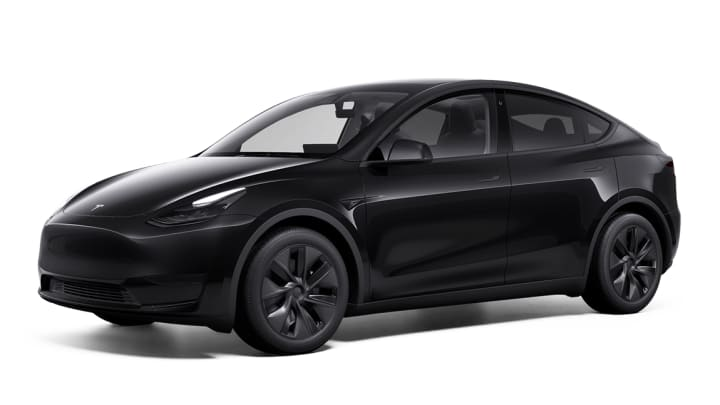
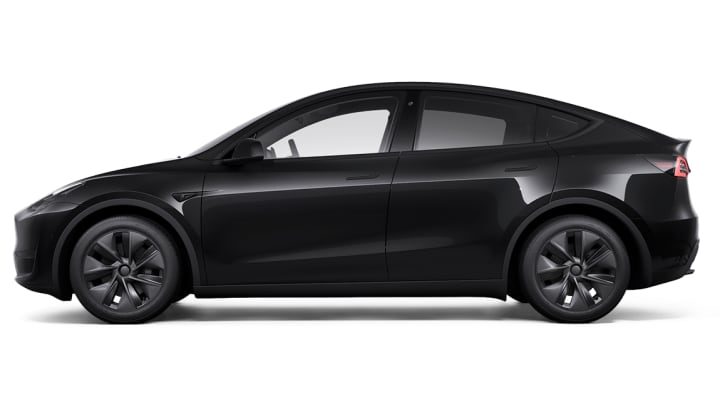
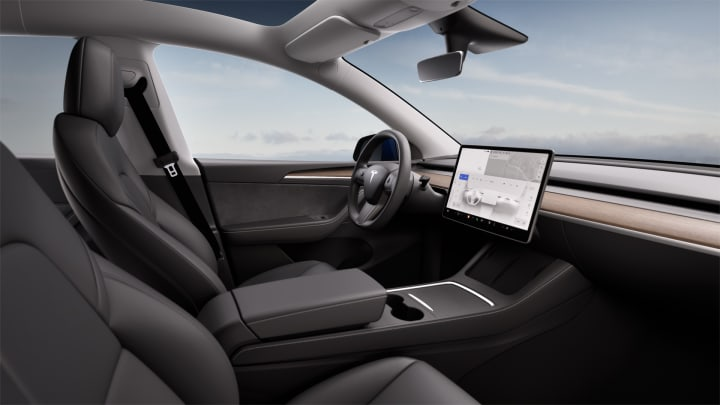
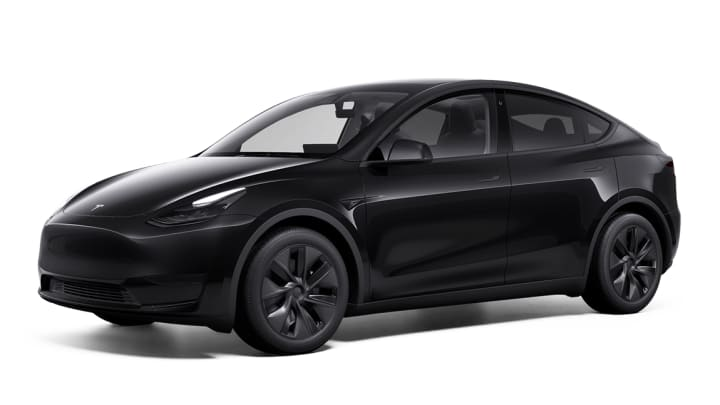
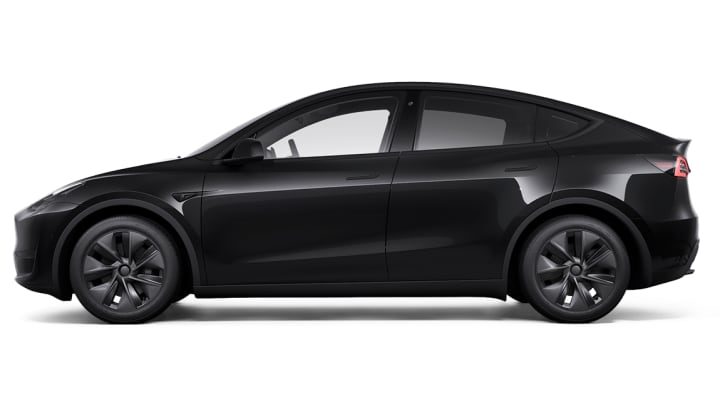
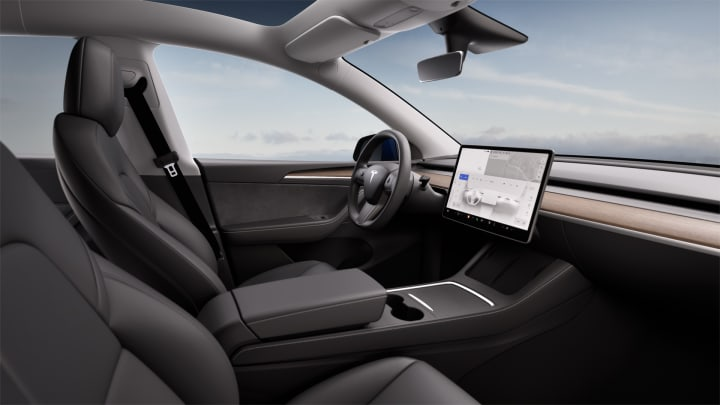

In [42]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup

c_options = webdriver.ChromeOptions()
c_options.add_argument("--start-maximized")
c_driver = webdriver.Chrome(options=c_options)

url = 'https://www.tesla.com/es_ES/inventory/used/my?arrangeby=plh&zip=28045&range=0'
c_driver.get(url)
soup = c_driver.page_source

soup = BeautifulSoup(soup, 'html.parser')
soup

In [30]:
import pandas as pd
df = pd.DataFrame(columns=['model', 'color','year', 'km', 'price'])

In [43]:
for i in soup.find_all('article'):
    year = i.find('h3').find_all('span')[0].text
    model = i.find('h3').find_all('span')[1].text
    price = str(i.find('div', class_='result-price').text).split()[0]
    km = str(i.find('div', class_='result-basic-info').find_all('div')[1].find('span').text).split()[-2:-1][0]
    color = i.find('ul', class_='result-regular-features tds-list tds-list--unordered').find('li').text
    print(model, year,km, color, price)
    df.loc[len(df)] = [model, color, year, km, price]

Model Y 2024 12.146 Pintura Plateado Mercurio 40.500
Model Y 2023 48.582 Color Negro Sólido 46.800


In [44]:
df

,model,color,year,km,price
0,Model 3,Color Negro Sólido,2019,60.048,31.400
1,Model 3,Color Negro Sólido,2022,15.291,31.600
2,Model 3,Color Multicapas Rojo,2021,79.681,33.200
3,Model 3,Color Multicapas Rojo,2021,57.523,34.100
4,Model 3,Color Negro Sólido,2021,76.959,34.900
5,Model 3,Color Blanco Perla Multicapas,2023,39.315,35.100
6,Model 3,Color Multicapas Rojo,2021,53.081,35.300
7,Model 3,Plata Medianoche Metalizado,2021,63.771,35.900
8,Model 3,Color Multicapas Rojo,2021,26.090,35.900
9,Model 3,Color Negro Sólido,2021,42.191,36.300


In [45]:
def getColor(string):
    if 'Negro' in string or 'negra' in string:
        return 'Negro'
    elif 'Blanco' in string:
        return 'Blanco'
    elif 'Plateado' in string or 'Plata' in string:
        return 'Gris/Plata'
    elif 'azul' in string:
        return 'Azul'
    elif 'Rojo' in string:
        return 'Rojo'
df_test = df.copy()

In [49]:
df_test['color'] = df_test['color'].apply(lambda row: getColor(row))

In [61]:
df_3 = pd.read_csv('df_teslas.csv')
df_3.drop(columns=['name'], inplace=True)
df_3['price'] = df_3['price'].apply(lambda row: row.split()[0])
df_final = pd.concat([df_3, df_test])
df_final.to_csv('df_tesla_final.csv', index=False)